In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
ROOT_DIR = '/content/gdrive/MyDrive/OpentronsSAM2/data'

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.1/874.1 kB 28.8 MB/s eta 0:00:00


In [4]:
import os
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # finetune yolo

# Use the model
# Verify the path to your YAML file
data_yaml = os.path.join(ROOT_DIR, "google_colab_config.yaml")
# Print the contents of the file to check for errors
!cat {data_yaml}

# Ensure the file exists and is in the correct format
if os.path.exists(data_yaml):
  results = model.train(data=data_yaml, epochs=50, augment=True, device="mps", name="labelVersion", cos_lr=True, lr0=0.001, lrf=0.0001, cls=0.6, dfl=2.0)  # train the model
else:
  print(f"Error: YAML file not found at {data_yaml}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 179MB/s]


path: '/content/gdrive/My Drive/OpentronsSAM2/data' 
train: images/train  # train images (relative to 'path')
val: images/train  # val images (relative to 'path')

# Classes
names:
  0: biorad_96_wellplate_200ul_pcr
  1: opentrons_96_filtertiprack_20ul
  2: pipette
  3: corning_384_wellplate_112ul_flat
  4: tip
Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/OpentronsSAM2/data/google_colab_config.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=labelVersion, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=Fal

100%|██████████| 755k/755k [00:00<00:00, 36.8MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/gdrive/My Drive/OpentronsSAM2/data/labels/train.cache... 115 images, 0 backgrounds, 1 corrupt: 100%|██████████| 116/116 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/gdrive/My Drive/OpentronsSAM2/data/images/train/tip3.png: ignoring corrupt image/label: image size (9, 9) <10 pixels


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/gdrive/My Drive/OpentronsSAM2/data/labels/train.cache... 115 images, 0 backgrounds, 1 corrupt: 100%|██████████| 116/116 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/gdrive/My Drive/OpentronsSAM2/data/images/train/tip3.png: ignoring corrupt image/label: image size (9, 9) <10 pixels


Plotting labels to runs/detect/labelVersion/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/labelVersion
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G     0.5917      3.892      1.593         12        640: 100%|██████████| 8/8 [00:38<00:00,  4.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.77s/it]

                   all        115        115     0.0038          1      0.164      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G     0.2443      3.385      1.326         12        640: 100%|██████████| 8/8 [00:20<00:00,  2.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.64s/it]

                   all        115        115    0.00636          1      0.259      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      0.238      2.508      1.307          8        640: 100%|██████████| 8/8 [00:19<00:00,  2.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.73s/it]

                   all        115        115     0.0135          1       0.52      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G     0.2394      1.853      1.293         10        640: 100%|██████████| 8/8 [00:19<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.75s/it]

                   all        115        115     0.0208          1      0.708      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G     0.2337       1.43      1.258         12        640: 100%|██████████| 8/8 [00:20<00:00,  2.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.72s/it]

                   all        115        115      0.804      0.758      0.852      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G     0.2238      1.212      1.229          9        640: 100%|██████████| 8/8 [00:19<00:00,  2.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.67s/it]

                   all        115        115      0.632      0.995      0.962      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G     0.2239      1.172       1.26          9        640: 100%|██████████| 8/8 [00:19<00:00,  2.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.67s/it]

                   all        115        115      0.953      0.588      0.681       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.2033      1.012      1.232          9        640: 100%|██████████| 8/8 [00:19<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.72s/it]

                   all        115        115      0.934      0.782      0.845      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.2254      1.008      1.259         12        640: 100%|██████████| 8/8 [00:19<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.67s/it]

                   all        115        115      0.955        0.8      0.817      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G     0.1997       0.95      1.235         10        640: 100%|██████████| 8/8 [00:19<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.63s/it]

                   all        115        115      0.918      0.991      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.2251     0.9361      1.199          8        640: 100%|██████████| 8/8 [00:19<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.64s/it]

                   all        115        115      0.847      0.997      0.862      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.1962     0.9104      1.213         10        640: 100%|██████████| 8/8 [00:19<00:00,  2.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.72s/it]

                   all        115        115      0.789      0.984      0.965      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.2039      0.911      1.249         11        640: 100%|██████████| 8/8 [00:19<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.70s/it]

                   all        115        115      0.838      0.774      0.742      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.2074     0.9239      1.229         10        640: 100%|██████████| 8/8 [00:19<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.64s/it]

                   all        115        115      0.848       0.98      0.863       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      0.194     0.9053      1.209         10        640: 100%|██████████| 8/8 [00:19<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.62s/it]

                   all        115        115      0.807      0.899      0.847      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.1984     0.8927      1.232         10        640: 100%|██████████| 8/8 [00:19<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.71s/it]

                   all        115        115      0.833      0.979      0.846      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.1963     0.9398      1.227          7        640: 100%|██████████| 8/8 [00:19<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.74s/it]

                   all        115        115      0.827       0.99      0.862      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.1825     0.8955      1.207         11        640: 100%|██████████| 8/8 [00:19<00:00,  2.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.73s/it]

                   all        115        115      0.824       0.96      0.862      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.1807     0.8034      1.205          8        640: 100%|██████████| 8/8 [00:19<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.65s/it]

                   all        115        115      0.811          1      0.866      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.1715     0.8372      1.218         11        640: 100%|██████████| 8/8 [00:19<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.64s/it]

                   all        115        115      0.855      0.967      0.868      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      0.178     0.8004      1.221          6        640: 100%|██████████| 8/8 [00:18<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.69s/it]

                   all        115        115      0.851      0.981      0.862      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.1571     0.7792      1.206         10        640: 100%|██████████| 8/8 [00:19<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.61s/it]

                   all        115        115      0.994          1      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.1828     0.7718      1.225          9        640: 100%|██████████| 8/8 [00:19<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.60s/it]

                   all        115        115      0.852          1      0.862      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.1561     0.7726      1.184         10        640: 100%|██████████| 8/8 [00:19<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.62s/it]

                   all        115        115       0.99          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.1539     0.7461      1.204         11        640: 100%|██████████| 8/8 [00:19<00:00,  2.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.64s/it]

                   all        115        115      0.863          1      0.904      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.1441     0.6928      1.155          8        640: 100%|██████████| 8/8 [00:19<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.60s/it]

                   all        115        115      0.859      0.999       0.89      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.1505     0.7484      1.165         10        640: 100%|██████████| 8/8 [00:18<00:00,  2.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.64s/it]

                   all        115        115       0.85      0.998      0.888      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.1431     0.6713      1.194         10        640: 100%|██████████| 8/8 [00:19<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.62s/it]

                   all        115        115      0.848      0.971       0.88       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.1529     0.7563      1.187          7        640: 100%|██████████| 8/8 [00:18<00:00,  2.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.73s/it]

                   all        115        115      0.864          1      0.977      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      0.151     0.6706      1.192         12        640: 100%|██████████| 8/8 [00:19<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.64s/it]

                   all        115        115       0.87          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.1336     0.6372      1.185          8        640: 100%|██████████| 8/8 [00:19<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.71s/it]

                   all        115        115      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.1314     0.6539      1.188          8        640: 100%|██████████| 8/8 [00:19<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.68s/it]

                   all        115        115      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.1277     0.6139      1.198         11        640: 100%|██████████| 8/8 [00:19<00:00,  2.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.72s/it]

                   all        115        115      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      0.118     0.6953      1.189         10        640: 100%|██████████| 8/8 [00:19<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.65s/it]

                   all        115        115      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.1208     0.5762      1.155         12        640: 100%|██████████| 8/8 [00:18<00:00,  2.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.64s/it]

                   all        115        115      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.1067     0.5485      1.181         10        640: 100%|██████████| 8/8 [00:19<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.66s/it]

                   all        115        115      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.1023     0.5209      1.205         10        640: 100%|██████████| 8/8 [00:18<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.64s/it]

                   all        115        115      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.1106     0.5439       1.15         11        640: 100%|██████████| 8/8 [00:19<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.63s/it]

                   all        115        115      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      0.106     0.5501      1.168          8        640: 100%|██████████| 8/8 [00:19<00:00,  2.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.75s/it]

                   all        115        115      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.1014     0.5415      1.182          8        640: 100%|██████████| 8/8 [00:19<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.67s/it]

                   all        115        115      0.997          1      0.995      0.995


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.1822      2.386      1.246          3        640: 100%|██████████| 8/8 [00:19<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.67s/it]

                   all        115        115      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.1225      1.416      1.171          3        640: 100%|██████████| 8/8 [00:19<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.64s/it]

                   all        115        115      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      0.122      1.247      1.147          3        640: 100%|██████████| 8/8 [00:19<00:00,  2.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.69s/it]

                   all        115        115      0.991          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.1028      1.328      1.152          3        640: 100%|██████████| 8/8 [00:19<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.60s/it]

                   all        115        115      0.966          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.0975      1.359      1.114          3        640: 100%|██████████| 8/8 [00:18<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.63s/it]

                   all        115        115      0.994          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G    0.08922     0.9741      1.114          3        640: 100%|██████████| 8/8 [00:19<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.58s/it]

                   all        115        115      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.1281     0.9897      1.275          3        640: 100%|██████████| 8/8 [00:19<00:00,  2.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.59s/it]

                   all        115        115      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G    0.09824     0.9417      1.169          3        640: 100%|██████████| 8/8 [00:19<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.60s/it]

                   all        115        115      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.1048      1.177      1.173          3        640: 100%|██████████| 8/8 [00:18<00:00,  2.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.68s/it]

                   all        115        115      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G    0.08951     0.9053      1.152          3        640: 100%|██████████| 8/8 [00:19<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.62s/it]

                   all        115        115      0.997          1      0.995      0.995



50 epochs completed in 0.375 hours.
Optimizer stripped from runs/detect/labelVersion/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/labelVersion/weights/best.pt, 6.3MB

Validating runs/detect/labelVersion/weights/best.pt...
Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.14s/it]


                   all        115        115      0.997          1      0.995      0.995
biorad_96_wellplate_200ul_pcr         26         26      0.998          1      0.995      0.995
opentrons_96_filtertiprack_20ul         53         53      0.999          1      0.995      0.995
               pipette         10         10      0.995          1      0.995      0.995
corning_384_wellplate_112ul_flat         13         13      0.996          1      0.995      0.995
                   tip         13         13      0.996          1      0.995      0.995
Speed: 0.5ms preprocess, 85.7ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs/detect/labelVersion


In [12]:
#run already finetuned model
import os
from ultralytics import YOLO
model_path = os.path.join(ROOT_DIR, '0.001LR50EpochsYOLOSAM2Model/weights/best.pt')
model = YOLO(model_path)

In [6]:
import shutil

In [7]:
source = '/content/runs/detect/labelVersion'
destination = '/content/gdrive/My Drive/OpentronsSAM2/data/0.001LR50EpochsYOLOSAM2Model'

In [8]:
shutil.copytree(source, destination, dirs_exist_ok=True)

'/content/gdrive/My Drive/OpentronsSAM2/data/0.001LR50EpochsYOLOSAM2Model'


0: 640x640 1 biorad_96_wellplate_200ul_pcr, 126.6ms
1: 640x640 1 corning_384_wellplate_112ul_flat, 126.6ms
2: 640x640 1 pipette, 126.6ms
3: 640x640 1 tip, 126.6ms
4: 640x640 1 opentrons_96_filtertiprack_20ul, 126.6ms
Speed: 2.0ms preprocess, 126.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


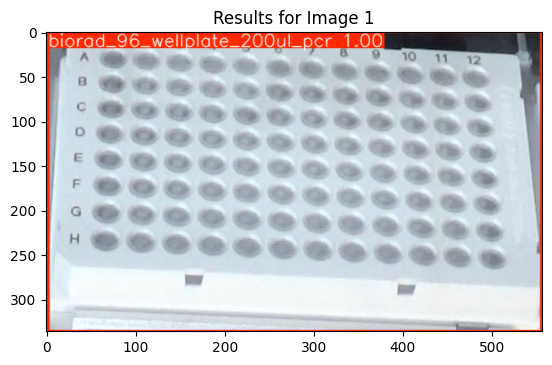

biorad_96_wellplate_200ul_pcr




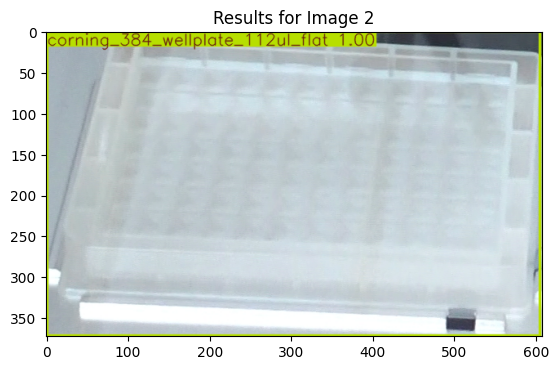

corning_384_wellplate_112ul_flat




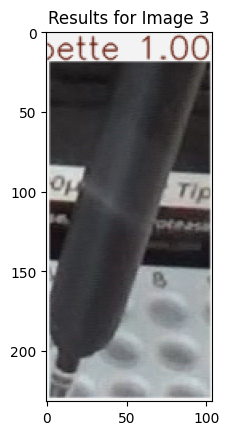

pipette




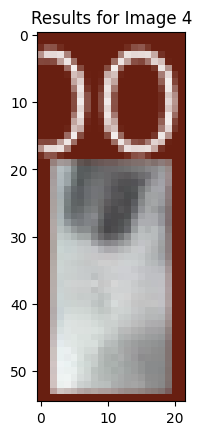

tip




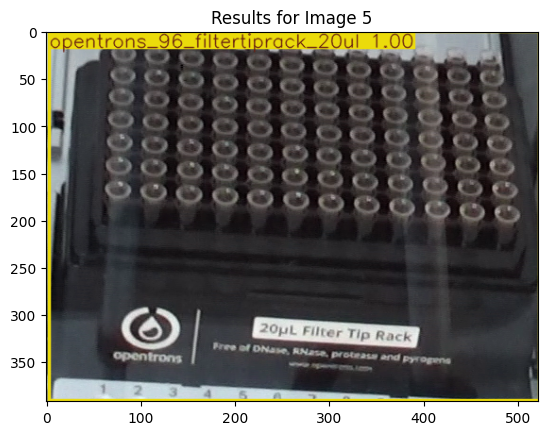

opentrons_96_filtertiprack_20ul




In [9]:
import matplotlib.pyplot as plt

imgList = ["/content/bioRadWellplate19.png", "/content/nestWellplate4.png", "/content/pipette3.png", "/content/tip5.png", "/content/tiprack61.png"]
results = model.predict(imgList, agnostic_nms = True)  # results list

# View results
names = model.names

for idx, r in enumerate(results):
    # generate image
    annotated_image = r.plot()
    plt.imshow(annotated_image)
    plt.title(f"Results for Image {idx + 1}")
    plt.show()

    labwareNames = []
    for idx, c in enumerate(r.boxes.cls):
        labware = str(names[int(c)])
        labwareNames += [labware]
    #find deck slot
    for idx in range(len(r.boxes)):
         print(labwareNames[idx])


    print("\n")


